In [1]:
import tweepy  
import re
import pandas as pd
import numpy as np

In [2]:
##Create Twitter Api and access
consumer_key = "OSsZj24DbhOE61n6xloniN9yk"
consumer_secret = "RPnfhKDdWZDIqJKp4guruVfJRxeHBqZHRfOiK7gwnZSaDizDAu"
access_token = "1194813446761697280-TY2vVGm6hJIUt7boqAF6Rqyqc3HUSq"
access_token_secret = "zloMKPRFapxMqs9VfThWI5LeN5Y6tHfQVRUeuxrDgA08W"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  
auth.set_access_token(access_token, access_token_secret)  
api = tweepy.API(auth,wait_on_rate_limit=True)  

In [3]:
##create new dataframe for tweets
df = pd.DataFrame(columns=['text','source'])
msgs = []
msg =[]
for tweet in tweepy.Cursor(api.search, q='#President', rpp=1000).items(1000):
    msg = [tweet.text, tweet.source]
    msg = tuple(msg)                    
    msgs.append(msg) 
    
df = pd.DataFrame(msgs)
df.columns=['tweets','posting_source']

df.loc[:].head(1000)

,tweets,posting_source
0,RT @lootgous: #President .@CyrilRamaphosa \nth...,Twitter for Android
1,RT @mselon3: #Macron au fond du gouffre. Depui...,Twitter Web App
2,#President #impeached4life doesn't have any b...,Twitter for Android
3,Good morning from #Kigali #city. A @Rwandapoli...,Twitter Web App
4,RT @HolleSharon: @JoeBiden can #UnitedNations ...,Twitter for iPhone
...,...,...
995,RT @LorentzMathias: #Macron a perdu 8 pts sur ...,Twitter for Android
996,@CLH45 @IvankaTrump @seanhannity @realDonaldTr...,Twitter Web App
997,RT @LorentzMathias: #Macron a perdu 8 pts sur ...,Twitter for Android
998,RT @LorentzMathias: #Macron a perdu 8 pts sur ...,Twitter for Android


In [4]:
##Data process, removing all useless pattern
df['tweets'] = df['tweets'].str.replace('#President', '')
df.head(1000)

,tweets,posting_source
0,RT @lootgous: .@CyrilRamaphosa \nthis is a ba...,Twitter for Android
1,RT @mselon3: #Macron au fond du gouffre. Depui...,Twitter Web App
2,#impeached4life doesn't have any business sk...,Twitter for Android
3,Good morning from #Kigali #city. A @Rwandapoli...,Twitter Web App
4,RT @HolleSharon: @JoeBiden can #UnitedNations ...,Twitter for iPhone
...,...,...
995,RT @LorentzMathias: #Macron a perdu 8 pts sur ...,Twitter for Android
996,@CLH45 @IvankaTrump @seanhannity @realDonaldTr...,Twitter Web App
997,RT @LorentzMathias: #Macron a perdu 8 pts sur ...,Twitter for Android
998,RT @LorentzMathias: #Macron a perdu 8 pts sur ...,Twitter for Android


In [5]:
df['tweets'][30]

"RT @gd49er: I'm an Independent voter I'm not a Democrat or Republican\nI'm an American and will be voting for @realDonaldTrump \nfor #Preside…"

In [6]:
def preprocess_text(sen):
    # Remove 'RT' and user name at the beginning of the sentence
    sentence = re.sub(r'RT @[a-zA-Z0-9]+. ','',sen)
    # Removing html tags
    sentence = remove_tags(sentence)
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    # Remove URL 
    sentence=re.sub(r'http\S+|www.\S+', '', sentence, flags=re.MULTILINE)
    return sentence
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('', text)

In [7]:
new_tweets= []
sentences = list(df['tweets'])
for sen in sentences:
    new_tweets.append(preprocess_text(sen))
new_tweets[1]

' Macron au fond du gouffre Depuis septembre dernier la cote de confiance du pr sident chut de points pour atteindre '

In [8]:
len(new_tweets)

1000

In [12]:
##Select the second hashtag_medicare
df2 = pd.DataFrame(columns=['text','source'])
msgs2 = []
msg2 =[]
for tweet in tweepy.Cursor(api.search, q='#Medicare', rpp=1000).items(1000):
    msg2 = [tweet.text, tweet.source] 
    msg2 = tuple(msg2)                    
    msgs2.append(msg2)
    
df2 = pd.DataFrame(msgs2)
df2.columns=['tweets','posting_source']

df2['tweets'] = df2['tweets'].str.replace('#Medicare', '')

In [13]:
def preprocess_text(sen):
    # Remove 'RT' and user name at the beginning of the sentence
    sentence = re.sub(r'RT @[a-zA-Z0-9]+. ','',sen)
    # Removing html tags
    sentence = remove_tags(sentence)
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    # Remove URL 
    sentence=re.sub(r'http\S+|www.\S+', '', sentence, flags=re.MULTILINE)
    return sentence
    sentence=re.sub('[R-T]+', '', sentence, flags=re.MULTILINE)
    return sentence
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

new_tweets2= []
sentences = list(df2['tweets'])
for sen in sentences:
    new_tweets2.append(preprocess_text(sen))
new_tweets2[1]

'Honored to meet you today please know that will stand with you and the millions of other brave Americans who struggle '

In [14]:
## Merge dataframe for two hashtag, and dropping the duplicate rows
tag1='President'
tag1_df=pd.DataFrame({'Tweets': new_tweets,'class': tag1})
tag2='Medicare'
tag2_df=pd.DataFrame({'Tweets': new_tweets2,'class': tag2})
d=tag1_df.append(tag2_df, ignore_index=True)
d.drop_duplicates(subset ="Tweets", keep = False, inplace = True) 
d

,Tweets,class
2,impeached life doesn have any business skills...,President
3,Good morning from Kigali city Rwandapolice man...,President
4,JoeBiden can UnitedNations and this country o...,President
5,Just reminder what dems are always trying to d...,President
7,Buttigieg shouldn jump from being mayor to S ...,President
...,...,...
1994,If you have Part coverage one of your key bene...,Medicare
1995,Is this the way Trump amp the Republicans will...,Medicare
1996,RT MicheleS Aus geoffrey payne MinhKular Medic...,Medicare
1997,six protected classes policy guarantees acces...,Medicare


In [15]:
##Naive bayes
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
a= []
for i in d['Tweets']:
    str(i).replace(" ca","")
    a.append(i)

tokenized_sents = [word_tokenize(i) for i in a]
tokenized_sents

[nltk_data] Downloading package punkt to /Users/hanbinliu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['impeached',
  'life',
  'doesn',
  'have',
  'any',
  'business',
  'skills',
  'DaddyBailsOut',
  'all',
  'impeached',
  'life',
  'bankruptcies',
  'Hop',
  'co',
  'AcwgBAY'],
 ['Good',
  'morning',
  'from',
  'Kigali',
  'city',
  'Rwandapolice',
  'man',
  'in',
  'uniform',
  've',
  'found',
  'at',
  'KG',
  'ST',
  'leading',
  'to',
  'off',
  'co',
  'KkdNTEtGEg'],
 ['JoeBiden',
  'can',
  'UnitedNations',
  'and',
  'this',
  'country',
  'on',
  'day',
  'as',
  'UnitedWeStand',
  'TeamJoe',
  'Biden'],
 ['Just',
  'reminder',
  'what',
  'dems',
  'are',
  'always',
  'trying',
  'to',
  'do',
  'while',
  'they',
  're',
  'claiming',
  'our',
  'great',
  'realDonaldTrump',
  'co',
  'zyEZBOocfX'],
 ['Buttigieg',
  'shouldn',
  'jump',
  'from',
  'being',
  'mayor',
  'to',
  'S',
  'He',
  'needs',
  'more',
  'experience',
  'like',
  'hosting',
  'reality',
  'co',
  'fhirJ',
  'T'],
 ['DimaSadek',
  'Fo',
  'rassik',
  'ra',
  'is',
  'blesik',
  'ya',
  'fesh

In [16]:
count=d['class'].value_counts().tolist()
president_count=count[0]
medicare_count=count[1]

In [17]:
from numpy import *
def loadDataSet():
    postingList=tokenized_sents             # word dictionary
    classVec=[1]* president_count+[0]*medicare_count
    return postingList, classVec 

In [18]:
def createVocabList(dataSet):
     vocabSet = set([])      
     for document in dataSet:
         vocabSet = vocabSet | set(document)   
     return list(vocabSet)

In [19]:
def setOfWords2Vec(vocabList, inputSet):
    returnVec = [0]*len(vocabList)
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)] = 1
        else: print ("the word: %s is not in my Vocabulary!" % word)
    return returnVec

In [20]:
def trainNB1(trainMatrix,trainCategory):
    numTrainDocs=len(trainMatrix)
    numWord=len(trainMatrix[0])
    pAbusive=sum(trainCategory)/len(trainCategory)
    p0Num=ones(numWord)
    p1Num=ones(numWord)
    p0Demon=2
    p1Demon=2 
    for i in range(numTrainDocs):
        if trainCategory[i]==0:
            p0Num+=trainMatrix[i]
            p0Demon+=sum(trainMatrix[i])
        else:
            p1Num+=trainMatrix[i]
            p1Demon+=sum(trainMatrix[i])
    p0Vec=log(p0Num/p0Demon) 
    p1Vec=log(p1Num/p1Demon)
    return p0Vec,p1Vec,pAbusive

In [21]:
def classifyNB(vec2Classify,p0Vec,p1Vec,pClass1):
    p1=sum(vec2Classify*p1Vec)+log(pClass1)
    p0=sum(vec2Classify*p0Vec)+log(1-pClass1)
    if p1>p0:
        return 1
    else:
        return 0

In [22]:
def testingNB():
    listPosts,listClasses=loadDataSet()
    myVocabList=createVocabList(listPosts)
    trainMat=[]
    for postinDoc in listPosts:
        trainMat.append(setOfWords2Vec(myVocabList,postinDoc))
    p0V,p1V,pAb=trainNB1(trainMat,listClasses)
    testEntry=[ 'Here', 'are', 'the', 'ABCs', 'of', 'selecting','supplement', 'plan']
    thisDoc=setOfWords2Vec(myVocabList,testEntry)
    print(testEntry,'classified as:',classifyNB(thisDoc,p0V,p1V,pAb))
    testEntry=['is', 'not', 'corruptable', 'cares', 'about', 'everyone', 'well','being', 'regardless', 'of', 'race', 'gender', 'sex', 'religion', 'politics']
    thisDoc=array(setOfWords2Vec(myVocabList,testEntry))
    print(testEntry,'classified as:',classifyNB(thisDoc,p0V,p1V,pAb))
    testEntry=[ 'is', 'very', 'different', 'from', 'this', 'current', 'dumb', 'fuck', 'traitor']
    thisDoc=setOfWords2Vec(myVocabList,testEntry)
    print(testEntry,'classified as:',classifyNB(thisDoc,p0V,p1V,pAb))
    testEntry=['How', 'many', 'family', 'and', 'friends', 'would', 'still', 'be', 'alive', 'right', 'now' ]
    thisDoc=setOfWords2Vec(myVocabList,testEntry)
    print(testEntry,'classified as:',classifyNB(thisDoc,p0V,p1V,pAb))
    testEntry=['You', 'know', 'what', 'else', 'hit', 'a','record',  'The', 'national', 'debt' ]
    thisDoc=setOfWords2Vec(myVocabList,testEntry)
    print(testEntry,'classified as:',classifyNB(thisDoc,p0V,p1V,pAb))

## Test the NB classifier
if __name__=='__main__':
    testingNB()

the word: ABCs is not in my Vocabulary!
the word: selecting is not in my Vocabulary!
['Here', 'are', 'the', 'ABCs', 'of', 'selecting', 'supplement', 'plan'] classified as: 0
the word: corruptable is not in my Vocabulary!
the word: cares is not in my Vocabulary!
the word: regardless is not in my Vocabulary!
the word: sex is not in my Vocabulary!
['is', 'not', 'corruptable', 'cares', 'about', 'everyone', 'well', 'being', 'regardless', 'of', 'race', 'gender', 'sex', 'religion', 'politics'] classified as: 1
the word: dumb is not in my Vocabulary!
the word: fuck is not in my Vocabulary!
['is', 'very', 'different', 'from', 'this', 'current', 'dumb', 'fuck', 'traitor'] classified as: 1
the word: many is not in my Vocabulary!
the word: alive is not in my Vocabulary!
['How', 'many', 'family', 'and', 'friends', 'would', 'still', 'be', 'alive', 'right', 'now'] classified as: 1
the word: debt is not in my Vocabulary!
['You', 'know', 'what', 'else', 'hit', 'a', 'record', 'The', 'national', 'debt'] 

In [23]:
##transform class to float
d.loc[d['class'] =='Medicare','col1']='1'
d.loc[d['class'] =='President','col1']='0'
d.head(5000)

,Tweets,class,col1
2,impeached life doesn have any business skills...,President,0
3,Good morning from Kigali city Rwandapolice man...,President,0
4,JoeBiden can UnitedNations and this country o...,President,0
5,Just reminder what dems are always trying to d...,President,0
7,Buttigieg shouldn jump from being mayor to S ...,President,0
...,...,...,...
1994,If you have Part coverage one of your key bene...,Medicare,1
1995,Is this the way Trump amp the Republicans will...,Medicare,1
1996,RT MicheleS Aus geoffrey payne MinhKular Medic...,Medicare,1
1997,six protected classes policy guarantees acces...,Medicare,1


In [24]:
#'sigmoid' activation function
def sigmoid(X):
    return 1 / (1 + np.exp(-X))
 
print(sigmoid(np.array([1, 2, 1.1, 4])))

[0.73105858 0.88079708 0.75026011 0.98201379]


In [25]:
##'sigmoid' model without training
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array
from sklearn.preprocessing import LabelBinarizer
 
 
class SimpleNeuralNetwork(BaseEstimator, ClassifierMixin):
    def __init__(self, hidden_layer_size=100, learning_rate=.1, epochs=1000, debug_print_epoch=10):
        assert hidden_layer_size > 0
        self.hidden_layer_size_ = hidden_layer_size
        self.learning_rate_ = learning_rate
        self.epochs_ = epochs
        self.debug_print_epoch_ = debug_print_epoch
 
    def fit(self, X, y):
        X, y = check_X_y(X, y, accept_sparse=True)  # Makes sure the X and y play nice
 
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        # In this particular case, we'll make sure the number of classes is 2
        assert n_classes == 2
 
        n_samples, n_features = X.shape
 
        self.binarizer_ = LabelBinarizer().fit(y)
        Y_binary = self.binarizer_.transform(y)
 
        # Compute the weight matrices sizes and init with small random values
 
        # Hidden Layer
        self.A1_ = np.random.randn(n_features, self.hidden_layer_size_)
        # Output Layer
        self.A2_ = np.random.randn(self.hidden_layer_size_, 1)
 
        # ~~ SKIP TRAINING FOR NOW ~~
 
    def predict_proba(self, X):
        """ Output probabilities for each sample"""
        # make sure X is of an accepted type
        X = check_array(X, accept_sparse='csr')  
 
        # Apply linear function at the hidden layer
        Y_hidden = X.dot(self.A1_)
 
        # Apply sigmoid at the output layer
        Y_output = sigmoid(Y_hidden.dot(self.A2_))
 
        return np.hstack((1 - Y_output, Y_output))
 
    def predict(self, X):
        """ Output only the most likely class for each sample """
        scores = self.predict_proba(X)
        indices = scores.argmax(axis=1)
        return self.binarizer_.inverse_transform(indices)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
 
# Shuffle the data and then split it, keeping 20% aside for testing
X_train, X_test, y_train, y_test = train_test_split(d['Tweets'], d['col1'], test_size=0.25)
vectorizer = CountVectorizer(lowercase=True, binary=True)
vectorizer.fit(X_train)

classifier = SimpleNeuralNetwork(hidden_layer_size=100, epochs=500, learning_rate=0.01)
classifier.fit(vectorizer.transform(X_train), list(y_train.values))
 
print("Score:", classifier.score(vectorizer.transform(X_test), y_test))

Score: 0.4106280193236715


In [27]:
##'sigmoid' model with training by Backpropagation
class SimpleNeuralNetwork(BaseEstimator, ClassifierMixin):
    def __init__(self, hidden_layer_size=100, learning_rate=.1, epochs=1000, debug_print_epoch=10):
        assert hidden_layer_size > 0
        self.hidden_layer_size_ = hidden_layer_size
        self.learning_rate_ = learning_rate
        self.epochs_ = epochs
        self.debug_print_epoch_ = debug_print_epoch
 
    def fit(self, X, y):
        X, y = check_X_y(X, y, accept_sparse=True)  # Makes sure the X and y play nice
 
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        # In this particular case, we'll make sure the number of classes is 2
        assert n_classes == 2
 
        n_samples, n_features = X.shape
 
        self.binarizer_ = LabelBinarizer().fit(y)
        Y_binary = self.binarizer_.transform(y)
 
        # Compute the weight matrices sizes and init with small random values
 
        # Hidden Layer
        self.A1_ = np.random.randn(n_features, self.hidden_layer_size_)
        # Output Layer
        self.A2_ = np.random.randn(self.hidden_layer_size_, 1)
 
        # Training Process
        for epoch in range(self.epochs_):
            Y_hidden = X.dot(self.A1_)
            Y_output = sigmoid(Y_hidden.dot(self.A2_))
 
            error = Y_output - Y_binary
            d_A2 = error * Y_output * (1 - Y_output)
 
            hidden_error = d_A2.dot(self.A2_.T)
            d_A1 = hidden_error
 
            self.A1_ -= self.learning_rate_ * X.T.dot(d_A1)
            self.A2_ -= self.learning_rate_ * Y_hidden.T.dot(d_A2)
 
            if not epoch % self.debug_print_epoch_:
                score = self.score(X, y)
                print(f"Epoch={epoch} \t Score={score}")
 
    def predict_proba(self, X):
        """ Output probabilities for each sample"""
        # make sure X is of an accepted type
        X = check_array(X, accept_sparse='csr')  
 
        # Apply linear function at the hidden layer
        Y_hidden = X.dot(self.A1_)
 
        # Apply sigmoid at the output layer
        Y_output = sigmoid(Y_hidden.dot(self.A2_))
 
        return np.hstack((1 - Y_output, Y_output))
 
    def predict(self, X):
        """ Output only the most likely class for each sample """
        scores = self.predict_proba(X)
        indices = scores.argmax(axis=1)
        return self.binarizer_.inverse_transform(indices)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Shuffle the data and then split it, keeping 25% aside for testing
X_train, X_test, y_train, y_test = train_test_split(d['Tweets'], d['col1'], test_size=0.25)
vectorizer = CountVectorizer(lowercase=True, binary=True)
vectorizer.fit(X_train)
 
classifier = SimpleNeuralNetwork(hidden_layer_size=100, epochs=50, learning_rate=0.1)
classifier.fit(vectorizer.transform(X_train), list(y_train.values))
 
print("Score:", classifier.score(vectorizer.transform(X_test), y_test))  

Epoch=0 	 Score=0.6241935483870967
Epoch=10 	 Score=0.7677419354838709
Epoch=20 	 Score=0.8241935483870968
Epoch=30 	 Score=0.8709677419354839
Epoch=40 	 Score=0.8935483870967742
Score: 0.8019323671497585


In [29]:
##applying relu activation function
def relu(X):
    return np.maximum(0,X)

In [30]:
#'relu' model with training process
class SimpleNeuralNetwork(BaseEstimator, ClassifierMixin):
    def __init__(self, hidden_layer_size=100, learning_rate=.1, epochs=1000, debug_print_epoch=10):
        assert hidden_layer_size > 0
        self.hidden_layer_size_ = hidden_layer_size
        self.learning_rate_ = learning_rate
        self.epochs_ = epochs
        self.debug_print_epoch_ = debug_print_epoch
 
    def fit(self, X, y):
        X, y = check_X_y(X, y, accept_sparse=True)  # Makes sure the X and y play nice
 
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        # In this particular case, we'll make sure the number of classes is 2
        assert n_classes == 2
 
        n_samples, n_features = X.shape
 
        self.binarizer_ = LabelBinarizer().fit(y)
        Y_binary = self.binarizer_.transform(y)
 
        # Compute the weight matrices sizes and init with small random values
 
        # Hidden Layer
        self.A1_ = np.random.randn(n_features, self.hidden_layer_size_)
        # Output Layer
        self.A2_ = np.random.randn(self.hidden_layer_size_, 1)
 
        # Training Process
        for epoch in range(self.epochs_):
            Y_hidden = X.dot(self.A1_)
            Y_output = sigmoid(Y_hidden.dot(self.A2_))
 
            error = Y_output - Y_binary
            d_A2 = error * Y_output * (1 - Y_output)
 
            hidden_error = d_A2.dot(self.A2_.T)
            d_A1 = hidden_error
 
            self.A1_ -= self.learning_rate_ * X.T.dot(d_A1)
            self.A2_ -= self.learning_rate_ * Y_hidden.T.dot(d_A2)
 
            if not epoch % self.debug_print_epoch_:
                score = self.score(X, y)
                print(f"Epoch={epoch} \t Score={score}")
 
    def predict_proba(self, X):
        """ Output probabilities for each sample"""
        # make sure X is of an accepted type
        X = check_array(X, accept_sparse='csr')  
 
        # Apply linear function at the hidden layer
        Y_hidden = X.dot(self.A1_)
 
         # Apply relu at the output layer
        Y_output = relu(Y_hidden.dot(self.A2_))
 
        return np.hstack((1 - Y_output, Y_output))
 
    def predict(self, X):
        """ Output only the most likely class for each sample """
        scores = self.predict_proba(X)
        indices = scores.argmax(axis=1)
        return self.binarizer_.inverse_transform(indices)

In [31]:
# Shuffle the data and then split it, keeping 25% aside for testing
X_train, X_test, y_train, y_test = train_test_split(d['Tweets'], d['col1'], test_size=0.25)
vectorizer = CountVectorizer(lowercase=True, binary=True)
vectorizer.fit(X_train)
 
classifier = SimpleNeuralNetwork(hidden_layer_size=100, epochs=50, learning_rate=0.1)
classifier.fit(vectorizer.transform(X_train), list(y_train.values))
 
print("Score:", classifier.score(vectorizer.transform(X_test), y_test))  

Epoch=0 	 Score=0.5435483870967742
Epoch=10 	 Score=0.7467741935483871
Epoch=20 	 Score=0.8161290322580645
Epoch=30 	 Score=0.8274193548387097
Epoch=40 	 Score=0.8387096774193549
Score: 0.7439613526570048


In [32]:
##(Dense）Deep neural network 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(d['Tweets'], d['col1'], test_size=0.25)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')
from nltk.corpus import stopwords
 
vectorizer = CountVectorizer(binary=True, stop_words=stopwords.words('english'), 
                             lowercase=True, min_df=3, max_df=0.9, max_features=750000)
X_train_onehot = vectorizer.fit_transform(X_train)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hanbinliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()

##Two layer model
model.add(Dense(units=100, activation='relu', input_dim=len(vectorizer.get_feature_names())))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               48200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 48,301
Trainable params: 48,301
Non-trainable params: 0
_________________________________________________________________


In [35]:
history=model.fit(X_train_onehot[:-100], y_train[:-100], epochs=20, batch_size=128, verbose=1, 
          validation_data=(X_train_onehot[-100:], y_train[-100:]))
history

Train on 520 samples, validate on 100 samples
Epoch 1/20
520/520 [==============================] - 1s 1ms/step - loss: 0.6988 - accuracy: 0.4942 - val_loss: 0.6665 - val_accuracy: 0.7200
Epoch 2/20
520/520 [==============================] - 0s 52us/step - loss: 0.6620 - accuracy: 0.6962 - val_loss: 0.6333 - val_accuracy: 0.7300
Epoch 3/20
520/520 [==============================] - 0s 60us/step - loss: 0.6317 - accuracy: 0.8038 - val_loss: 0.6043 - val_accuracy: 0.8500
Epoch 4/20
520/520 [==============================] - 0s 50us/step - loss: 0.6031 - accuracy: 0.8692 - val_loss: 0.5761 - val_accuracy: 0.9000
Epoch 5/20
520/520 [==============================] - 0s 50us/step - loss: 0.5748 - accuracy: 0.8981 - val_loss: 0.5484 - val_accuracy: 0.9300
Epoch 6/20
520/520 [==============================] - 0s 49us/step - loss: 0.5461 - accuracy: 0.9231 - val_loss: 0.5206 - val_accuracy: 0.9500
Epoch 7/20
520/520 [==============================] - 0s 49us/step - loss: 0.5173 - accuracy: 0.9

In [36]:
scores = model.evaluate(vectorizer.transform(X_test), y_test, verbose=1)
print("Accuracy:", scores[1])

207/207 [==============================] - 0s 46us/step
Accuracy: 0.8454106450080872


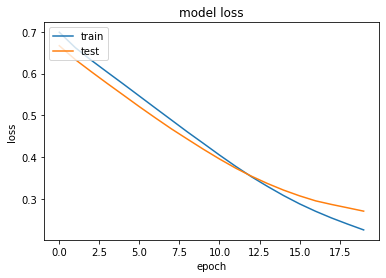

In [39]:
import matplotlib.pyplot as plt
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

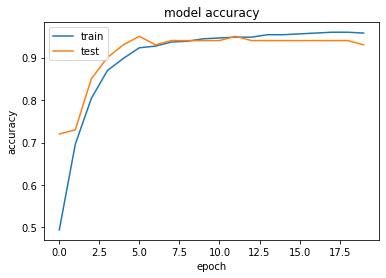

In [38]:
##Visualize the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(d['Tweets'], d['col1'], test_size=0.25)
vectorizer = CountVectorizer(binary=True, stop_words=stopwords.words('english'), 
                             lowercase=True, min_df=3, max_df=0.9, max_features=750000)
X_train_onehot = vectorizer.fit_transform(X_train)

In [41]:
##add dropout to reduce overfitting problem
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=len(vectorizer.get_feature_names())))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               42800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 42,901
Trainable params: 42,901
Non-trainable params: 0
_________________________________________________________________


In [42]:
history=model.fit(X_train_onehot[:-100], y_train[:-100], epochs=20, batch_size=128, verbose=1, 
          validation_data=(X_train_onehot[-100:], y_train[-100:]))
history

Train on 520 samples, validate on 100 samples
Epoch 1/20
520/520 [==============================] - 1s 1ms/step - loss: 0.7039 - accuracy: 0.4673 - val_loss: 0.6763 - val_accuracy: 0.6800
Epoch 2/20
520/520 [==============================] - 0s 59us/step - loss: 0.6674 - accuracy: 0.6019 - val_loss: 0.6564 - val_accuracy: 0.7100
Epoch 3/20
520/520 [==============================] - 0s 60us/step - loss: 0.6394 - accuracy: 0.6846 - val_loss: 0.6383 - val_accuracy: 0.7700
Epoch 4/20
520/520 [==============================] - 0s 60us/step - loss: 0.6164 - accuracy: 0.7404 - val_loss: 0.6218 - val_accuracy: 0.7800
Epoch 5/20
520/520 [==============================] - 0s 61us/step - loss: 0.5946 - accuracy: 0.7788 - val_loss: 0.6060 - val_accuracy: 0.7900
Epoch 6/20
520/520 [==============================] - 0s 59us/step - loss: 0.5696 - accuracy: 0.8115 - val_loss: 0.5897 - val_accuracy: 0.8000
Epoch 7/20
520/520 [==============================] - 0s 58us/step - loss: 0.5562 - accuracy: 0.8

In [43]:
scores = model.evaluate(vectorizer.transform(X_test), y_test, verbose=1)
print("Accuracy:", scores[1])

207/207 [==============================] - 0s 53us/step
Accuracy: 0.8792270421981812


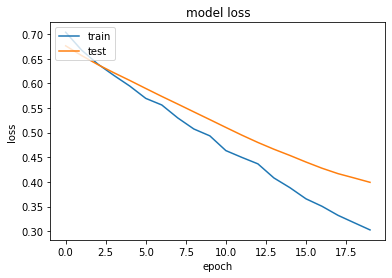

In [44]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

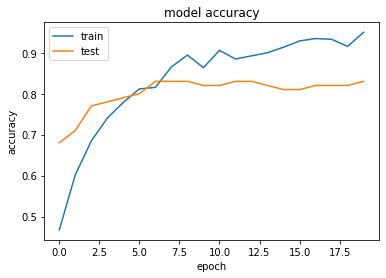

In [45]:
##Visualize the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()